**LINEAR REGRESSION WITH SCIKIT-LEARN**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# New section

**Imports**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

**Getting the data plotting the dataset using scatter plot**

In [ ]:
#Fetching the data
mydata = pd.read_excel("https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx")

#viewing the dataset
mydata.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

**Plotting the dataset using scatter plot**

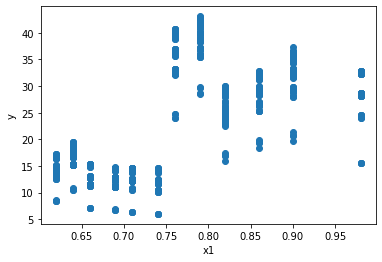

In [ ]:
#plotting the X1 against y
import matplotlib.pyplot as plt
plt.scatter(mydata.X1, mydata.Y1)
plt.xlabel('x1')
plt.ylabel('y')

# Reshaping the array
x = np.array(mydata.X1).reshape((-1, 1))
y = np.array(mydata.Y1)

**Creating a model and fitting it**

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

**Printing the results**

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.3872223619321592
intercept: -23.053014060655045
slope: [59.35905261]


**Predicting responses**

In [ ]:
y_pred = model.predict([[0.8],[0.9],[1.0]])
print('predicted response:', y_pred, sep='\n')

predicted response:
[24.43422803 30.37013329 36.30603855]


**LINEAR REGRESSION WITH KERAS TENSORFLOW**

**Importing libraries**

In [ ]:
import tensorflow as tf
import keras

**Defining and Compiling the Neural Network**

In [ ]:
model2 = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model2.compile(optimizer='sgd', loss='mean_squared_error')
model2.fit(x, y, epochs=1000, verbose=0)

**Obtaining Parameters or Weights**

In [ ]:
model2.weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[57.714943]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([-21.845284], dtype=float32)>]

**Predicting Responses**

In [ ]:
print(model2.predict([[0.8],[0.9],[1.0]]))

1/1 [==============================] - 0s 52ms/step
[[24.326672]
 [30.098164]
 [35.86966 ]]


**LINEAR REGRESSION WITH STATSMODELS**

**Importing libraries**

In [ ]:
# import library
import statsmodels.api as sm

# add column of one
x_with_one = sm.add_constant(x)

**Creating and fitting the model**

In [ ]:
# Create a model and fit it
model3 = sm.OLS(y, x_with_one)
results = model3.fit()

**Getting Results**

In [ ]:
# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     484.0
Date:                Tue, 27 Dec 2022   Prob (F-statistic):           1.59e-83
Time:                        02:20:52   Log-Likelihood:                -2676.5
No. Observations:                 768   AIC:                             5357.
Df Residuals:                     766   BIC:                             5366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -23.0530      2.081    -11.076      0.0

**LINEAR REGRESSION MANUALLY**

In [ ]:
x_x = np.linalg.inv(np.dot(x_with_one.T,x_with_one))
x_y = np.dot(x_with_one.T,y)
beta = np.dot(x_x,x_y)
beta

**MULTIPLE LINEAR REGRESSION WITH STATMODELS**

In [ ]:
# define new data
X = mydata[["X1","X2","X3","X4","X5","X6","X7","X8"]].to_numpy()
X = sm.add_constant(X)

# Create a model and fit it
model4 = sm.OLS(y, X)
results = model4.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        01:59:08   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0134     19.034      4.414      0.0

**Detecting Multicollinearity with VIF**

In [ ]:
# import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = mydata.drop(["Y1","Y2"], axis=1).columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(mydata.drop(["Y1","Y2"], axis=1).values, i)
                          for i in range(len(mydata.drop(["Y1","Y2"], axis=1).columns))]
                          
print(vif_data)

  feature         VIF
0      X1  168.948751
1      X2         inf
2      X3         inf
3      X4         inf
4      X5  134.035782
5      X6   10.796725
6      X7    4.293656
7      X8    4.496320


/usr/local/lib/python3.8/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


**Multiple Linear Regression Model After Droping Multicollinearity Variables**

In [ ]:
# define new data
Xclean = mydata[["X1","X3","X4","X5","X6","X7","X8"]].to_numpy()
Xclean = sm.add_constant(Xclean)

# Create a model and fit it
model4 = sm.OLS(y, Xclean)
results = model4.fit()

# Get results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        02:01:48   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0134     19.034      4.414      0.0